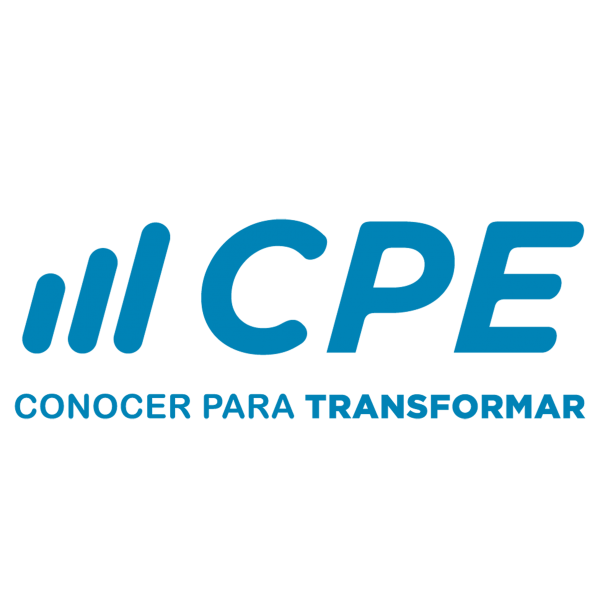

# Visualizando datos en un mapa con el paquete de Python «Folium»

Ya sabemos que Python posee multitud de librerías con las que realizar diferentes funciones y sobre todo permite mucho trabajar con datos geoespaciales y desplegar mapas, entre ellas se encuentra Folium. Google colab ya tiene de manera canonica esta libreria.

In [7]:
import folium
mapa = folium.Map(location=[-34.90528453431504, -56.18882583553827], zoom_start=100)
mapa

In [5]:
map = folium.Map(location=[-34.90528453431504, -56.18882583553827], tiles="Stamen Toner", zoom_start=15)
map

Nos dirigimos a otra ubicación y cambiamos de nuevo el mapa base:

In [6]:
map = folium.Map(location=[-34.90528453431504, -56.18882583553827], tiles="Stamen Terrain", zoom_start=15)
map

In [7]:
map = folium.Map(location=[-34.90528453431504, -56.18882583553827], tiles="Stamen Terrain", zoom_start=15)
map

Ejercicio:

probar diseños: ”CartoDB positron”, “CartoDB dark_matter”

In [8]:
map = folium.Map(location=[-25.274398, 133.775136], control_scale=True)
map

Vamos a cargar un archivo en formato GeoJSON (Folium no admite shapefiles) y lo vamos a hacer desde un enlace creado por el gobierno de Australia sobre avistamientos de koalas.



Para trabajar con shapes, utilizaremos la librería GeoPandas , pero eso en una próxima entrada.

Este es el código para insertar los datos en el visor, la siguiente línea de código permite descargar el mapa en formato .html para que puedas mostrarlo en un navegador:

In [13]:
folium.GeoJson('https://data.gov.au/geoserver/koala-records-for-twenty-years-to-2016/wfs?request=GetFeature&typeName=ckan_147a7ff0_e091_4752_9ca3_9c8707895953&outputFormat=json').add_to(map)
map.save("autralia.html")

## Ejercicio:
Cargar de una base de datos, la posición geospacial de centros de formación SENA Colombia.
Extraida de
https://www.datos.gov.co/Trabajo/Georeferenciaci-n-Centros-de-Aprendizaje-SENA/8cnh-7asj


In [8]:
import pandas as  pd
path = "/content/Centros_SENA.csv"
df = pd.read_csv(path)

In [9]:
df

,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO
0,CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...,9101,6.053527,-75.628910,POINT (-75.62891 6.053527),5,REGIONAL ANTIOQUIA,ANTIOQUIA,5,MEDELLIN,1
1,CENTRO PARA EL DESARROLLO AGROECOLOGICO Y AGRO...,9103,10.987720,-74.782770,POINT (-74.78277 10.98772),8,REGIONAL ATLANTICO,ATLANTICO,8,BARRANQUILLA,1
2,CENTRO AGROEMPRESARIAL Y MINERO,9104,10.373000,-75.461000,POINT (-75.461 10.373),13,REGIONAL BOLIVAR,BOLIVAR,13,CARTAGENA,1
3,CENTRO DE DESARROLLO AGROPECUARIO Y AGROINDUST...,9110,5.825560,-73.029790,POINT (-73.02979 5.82556),15,REGIONAL BOYACA,BOYACA,15,TUNJA,1
4,CENTRO PARA LA FORMACION CAFETERA,9112,5.032900,-75.450600,POINT (-75.4506 5.0329),17,REGIONAL CALDAS,CALDAS,17,MANIZALES,1
...,...,...,...,...,...,...,...,...,...,...,...
113,CENTRO PARA LA BIODIVERSIDAD Y EL TURISMO DEL ...,9517,-4.210806,-69.945538,POINT (-69.945538 -4.210806),91,REGIONAL AMAZONAS,AMAZONAS,91,LETICIA,1
114,CENTRO AMBIENTAL Y ECOTURISTICO DEL NORORIENTE...,9547,3.874345,-67.921817,POINT (-67.921817 3.874345),94,REGIONAL GUAINIA,GUAINIA,94,PTO INIRIDA,1
115,"CENTRO DE DESARROLLO AGROINDUSTRIAL, TURISTICO...",9533,2.561174,-72.642749,POINT (-72.642749 2.561174),95,REGIONAL GUAVIARE,META,50,PUERTO CONCORDIA,450
116,CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...,9548,1.249076,-70.235523,POINT (-70.235523 1.249076),97,REGIONAL VAUPES,VAUPES,97,MITU,1


In [10]:
df.columns

Index(['CENTRO_FORMACION', 'CODIGO_CENTRO', 'LATITUD', 'LONGITUD',
       'GEORREFERENCIACION', 'NOMBRE_REGIONAL', 'CODIGO_REGIONAL',
       'NOMBRE_DEPARTAMENTO', 'CODIGO_DEPARTAMENTO', 'NOMBRE_MUNICIPIO',
       'CODIGO_MUNICIPIO'],
      dtype='object')

In [11]:
df2 = df[['CENTRO_FORMACION','LATITUD','LONGITUD','NOMBRE_DEPARTAMENTO', 'CODIGO_REGIONAL', 'CODIGO_DEPARTAMENTO']]
df2 = df2[df2['NOMBRE_DEPARTAMENTO']=='ANTIOQUIA']
df2

,CENTRO_FORMACION,LATITUD,LONGITUD,NOMBRE_DEPARTAMENTO,CODIGO_REGIONAL,CODIGO_DEPARTAMENTO
0,CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...,6.053527,-75.628910,ANTIOQUIA,REGIONAL ANTIOQUIA,5
17,CENTRO DEL DISENO Y MANUFACTURA DEL CUERO,6.180260,-75.605190,ANTIOQUIA,REGIONAL ANTIOQUIA,5
18,CENTRO DE FORMACION EN DISENO CONFECCION Y MODA,6.179960,-75.605180,ANTIOQUIA,REGIONAL ANTIOQUIA,5
19,CENTRO PARA EL DESARROLLO DEL HABITAT Y LA CON...,6.301000,-75.568000,ANTIOQUIA,REGIONAL ANTIOQUIA,5
20,CENTRO DE TECNOLOGIA DE LA MANUFACTURA AVANZADA,6.301600,-75.568600,ANTIOQUIA,REGIONAL ANTIOQUIA,5
21,CENTRO TECNOLOGICO DEL MOBILIARIO,6.180730,-75.605190,ANTIOQUIA,REGIONAL ANTIOQUIA,5
22,CENTRO TEXTIL Y DE GESTION INDUSTRIAL,6.302000,-75.568500,ANTIOQUIA,REGIONAL ANTIOQUIA,5
48,CENTRO DE COMERCIO,6.254800,-75.575300,ANTIOQUIA,REGIONAL ANTIOQUIA,5
58,CENTRO DE SERVICIOS DE SALUD,6.255000,-75.574680,ANTIOQUIA,REGIONAL ANTIOQUIA,5
59,CENTRO DE SERVICIOS Y GESTION EMPRESARIAL,6.256000,-75.566000,ANTIOQUIA,REGIONAL ANTIOQUIA,5


In [12]:
map_sena = folium.Map(location=[4.570868, -74.297333], control_scale=True)
map_sena

In [13]:
#Dados de coordenadas geoespaciais
my_zip = zip(df2['LATITUD'], df2['LONGITUD'])
list_of_my_zip = list(my_zip)
list_of_my_zip

[(6.053527, -75.62891),
 (6.18026, -75.60519),
 (6.17996, -75.60518),
 (6.301, -75.568),
 (6.3016, -75.5686),
 (6.18073, -75.60519),
 (6.302, -75.5685),
 (6.2548, -75.5753),
 (6.255, -75.57468),
 (6.256, -75.566),
 (4.603, -74.07999),
 (4.652, -74.0628),
 (6.49275, -74.4178),
 (6.321175, -75.37142),
 (5.476675, -74.668),
 (4.54, -75.686),
 (7.0659, -73.851),
 (7.584644, -74.800809),
 (7.996571, -75.196427),
 (6.55898, -75.829196)]

In [14]:
from folium.plugins import HeatMap
hm_layer = HeatMap(list_of_my_zip,
                   min_opacity=0.5,
                   radius=10,
                   blur=6)

In [15]:
hm_layer.add_to(map_sena)

In [16]:
map_sena

In [18]:
lat = 4.570868
lon = -74.297333

map_sena = folium.Map(location=[lat,lon], control_scale=True)
feature_group = folium.FeatureGroup("Locations")
for lat, lon, name, reg, cod  in zip(df2['LATITUD'], df2['LONGITUD'],df2['CENTRO_FORMACION'], df['CODIGO_REGIONAL'], df['CODIGO_DEPARTAMENTO']):
    feature_group.add_child(folium.Marker(location=[lat,lon],popup= str(name) + ' , ' + str(reg) +' , '+  str(cod)))

map_sena.add_child(feature_group)

In [20]:
map_sena.save("SENA_Centros_Antioquia.html")